In [31]:
import sys
sys.path.append('./RGCPD')
from classes import RGCPD

## Initialize RGCPD class
args:
- list_of_name_path
- start_end_TVdate

        list_of_name_path : list of name, path tuples. 
        Convention: first entry should be (name, path) of target variable (TV).
        list_of_name_path = [('TVname', 'TVpath'), ('prec_name1', 'prec_path1')]
        
        TV period : tuple of start- and enddate in format ('mm-dd', 'mm-dd')

In [32]:
rg = RGCPD()

initializing with test data


Post-process input data 
args:
- loadleap=False
- seldates=None 
- selbox=None,
- format_lon='east_west',
- detrend=True
- anomaly=True

In [33]:
rg.pp_precursors()

Loaded post-processed data of sst_test



### Post-processing Target Variable

In [34]:
rg.pp_TV()

original tfreq of imported response variable is converted to desired tfreq
Detrending Respone Variable.
Performing 3 day rolling mean with gaussian window (std=1.5) to get better interannual statistics
using absolute anomalies w.r.t. climatology of smoothed concurrent day accross years


In [35]:
rg.traintest()

No train test split


In [36]:
rg.calc_corr_maps() 


sst - calculating correlation maps
Progress traintest set 100.0%, trainsize=(320dp, 100%)



In [39]:
rg.cluster_regions()

Plotting Corr maps sst_test_labels_init, split 0, lag 10



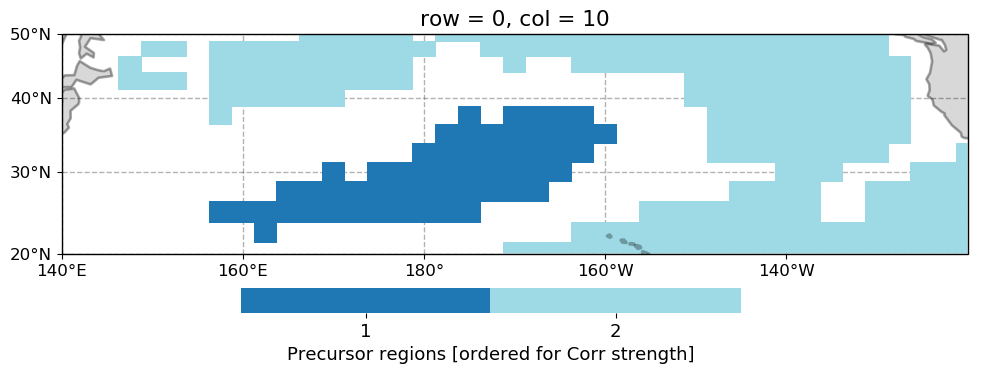

In [40]:
rg.quick_view_labels() 

In [41]:
rg.get_ts_prec()

sst_test
There are [2] regions (list of different splits)


In [42]:
rg.PCMCI_df_data()

Progress causal inference - traintest set 100.0%


                  lag_corr  region_number       var  causal  lag_tig
0 t2m_eUS                0              0   t2m_eUS    True     -1.0
  1..1..sst_test         1              1  sst_test    True      0.0
  1..2..sst_test         1              2  sst_test    True      0.0



Plotting all fields significant at alpha_level_tig, while conditioning on parents that were found in the PC step
Plotting Corr maps sst_test_labels, split 0, lag sst_test_labels_tigr



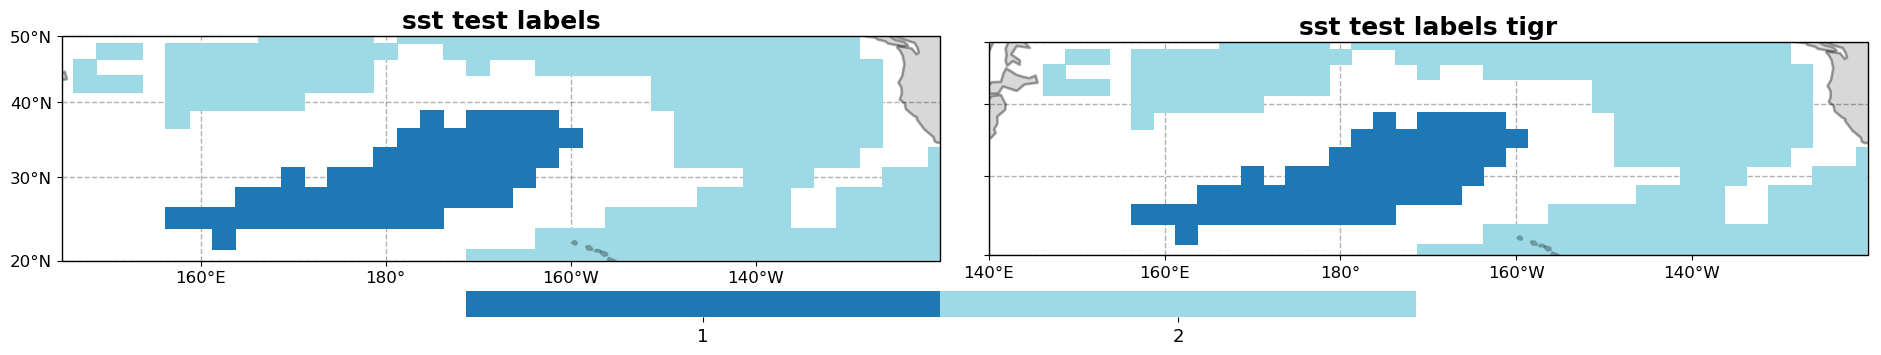

Plotting Corr maps sst_test_labels, split 0, lag robustness sst_test causal



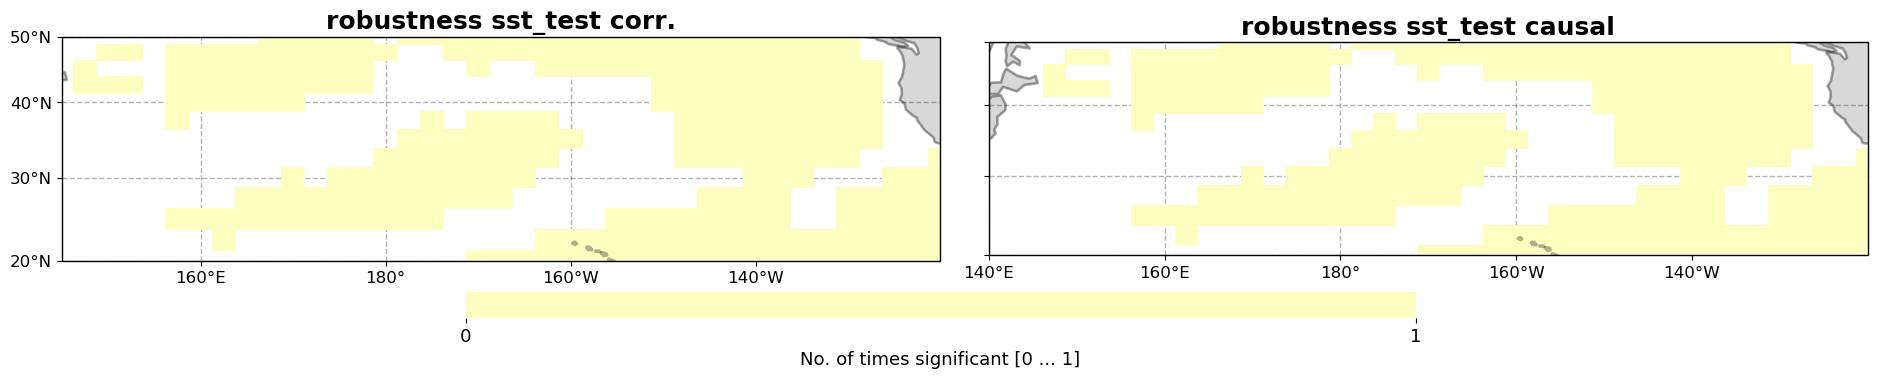


Plotting all fields significant at alpha_level_tig, while conditioning on parents that were found in the PC step
Plotting Corr maps sst_corr_and_tigr, split 0, lag sst_test_corr_tigr



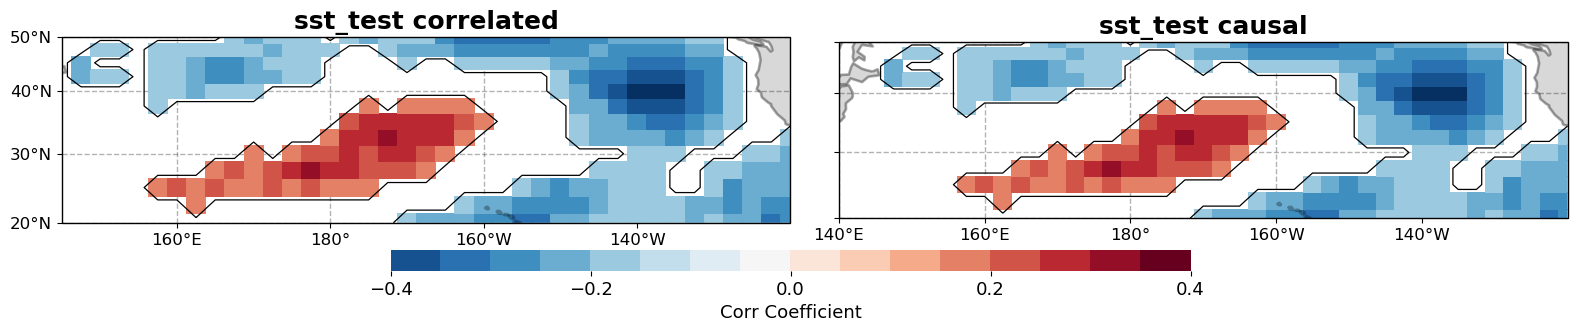

In [43]:
rg.plot_maps_sum()

In [45]:
rg.df_data

t2m_eUS  1..1..sst_test  1..2..sst_test  TrainIsTrue  RV_mask
0 1979-01-11  2.450949        0.155905        0.172561         True    False
  1979-01-21  5.202951        0.556707       -0.094193         True    False
  1979-01-31  1.976927        0.269605       -0.090640         True    False
  1979-02-10  0.300682        0.533181       -0.204430         True    False
  1979-02-20  3.358494        1.020512       -0.207898         True    False
...                ...             ...             ...          ...      ...
  2018-11-17  1.427837       -0.441909        0.784427         True    False
  2018-11-27  4.672652       -0.261957        0.737966         True    False
  2018-12-07  1.403350       -0.341637        0.577418         True    False
  2018-12-17  6.580028       -0.198795        0.412008         True    False
  2018-12-27  6.242537       -0.124083        0.296003         True    False

[1440 rows x 5 columns]

# Forecasting
Below done with test data, same format as df_data

In [46]:
from func_fc import fcev 

In [49]:
fc = fcev.get_test_data()

In [51]:
fc.get_TV(kwrgs_events=None, kwrgs_pp=None)

Define statmodel:

In [53]:
logit = ('logit', None)

In [54]:
fc.fit_models(stat_model_l=[logit], lead_max=30, 
                   keys_d='all', causal=False)

getting keys associated with name all
tfreq: 10, max lag: 3, i.e. 25 days
Progress 100%

('logit', None) 


In [55]:
dict_experiments = {}       
fc.perform_validation(n_boot=100, blocksize='auto', 
                              threshold_pred=(2, 'times_clim'))
dict_experiments['test'] = fc.dict_sum

ROC area	: 0.900
P-R area	: 0.796
BSS     	: 0.473
Precision       : 0.814
Accuracy        : 0.828


0 logit


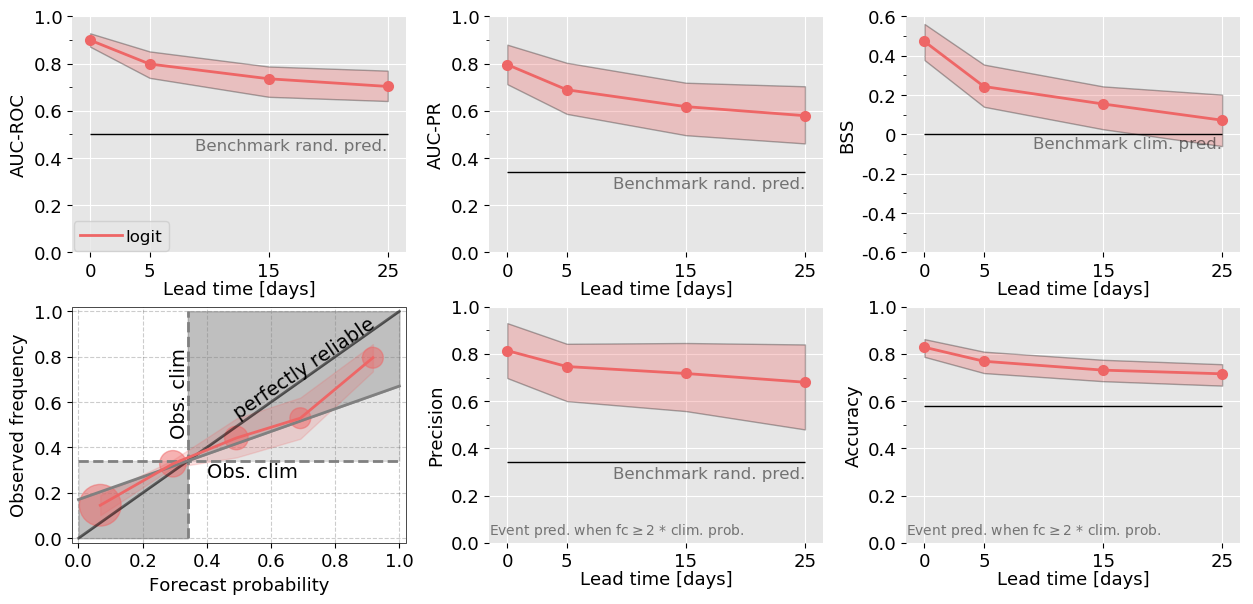

In [56]:
import valid_plots as dfplots
kwrgs = {'wspace':0.25, 'col_wrap':3, 'threshold_bin':fc.threshold_pred}
met = ['AUC-ROC', 'AUC-PR', 'BSS', 'Rel. Curve', 'Precision', 'Accuracy']
expers = list(dict_experiments.keys())
models   = list(dict_experiments[expers[0]].keys())
line_dim = 'model'


fig = dfplots.valid_figures(dict_experiments, expers=expers, models=models,
                          line_dim=line_dim, 
                          group_line_by=None,  
                          met=met, **kwrgs)

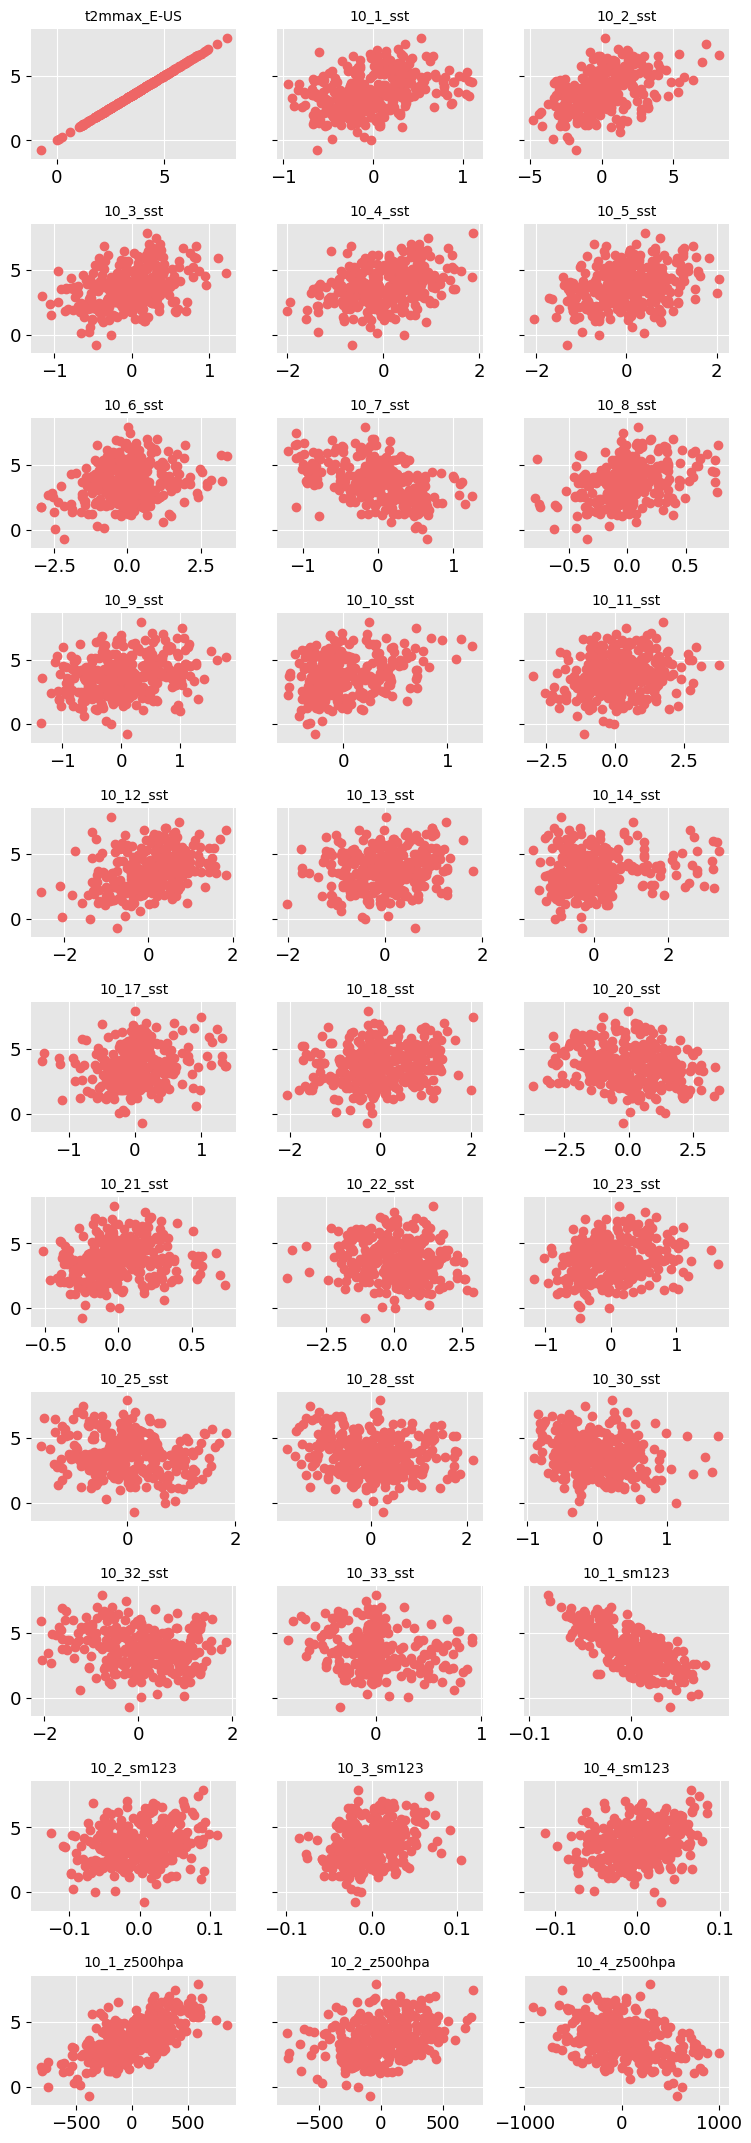

In [57]:
fc.plot_scatter()